In [1]:
import os
import tensorflow as tf
import cv2


In [2]:
var=os.path.join('data','output_images_train')
os.listdir(var)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = tf.keras.utils.image_dataset_from_directory(var)

Found 60000 files belonging to 10 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

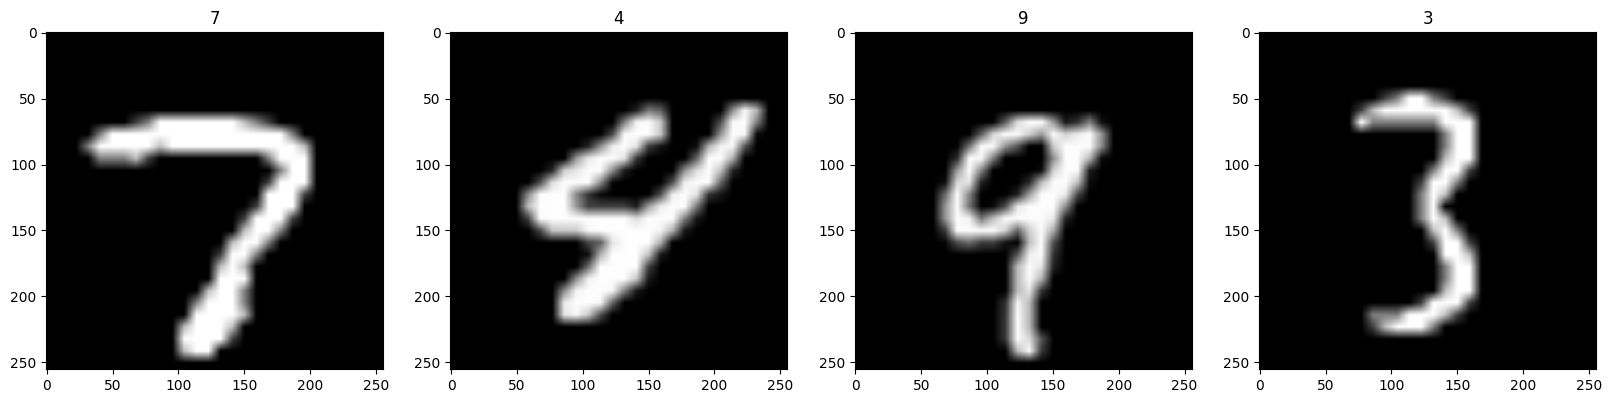

In [7]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

plt.show()

data training

In [8]:
data = data.map(lambda x,y:(x/255,y))

In [9]:
scaled_iterator = data.as_numpy_iterator()

In [10]:
batch = scaled_iterator.next()

In [11]:
batch[0].max()

1.0

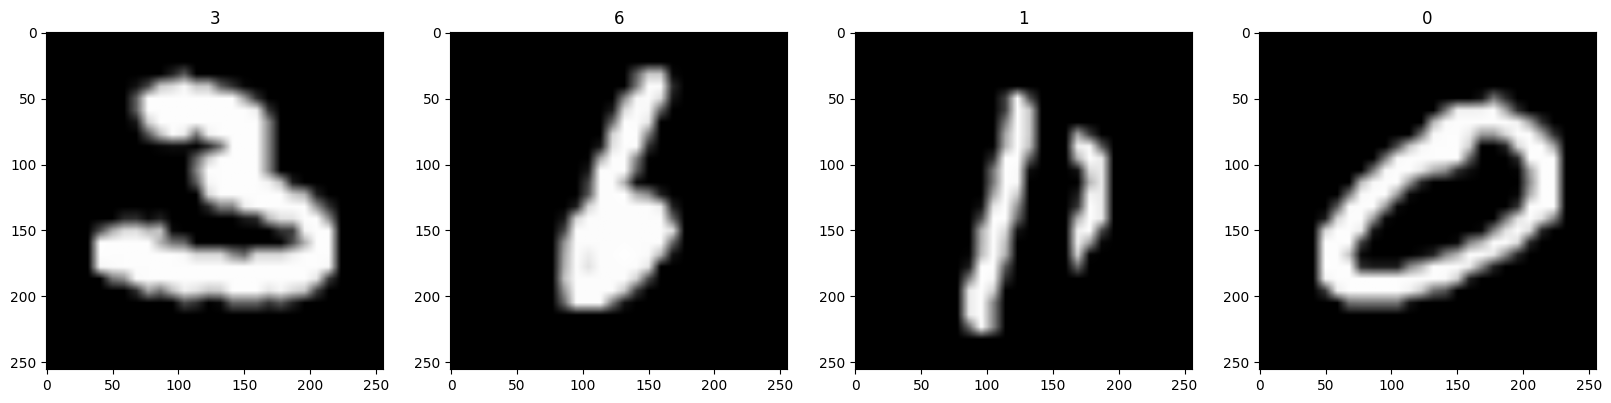

In [12]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

spliting the data


In [13]:
train_size = int(len(data)*0.85)
val_size = len(data)-train_size

print(f"Train size:{train_size}, Val_size:{val_size}, ")

train = data.take(train_size)
val = data.skip(train_size).take(val_size)

Train size:1593, Val_size:282, 


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Change the units to 10 and use 'softmax'

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

In [16]:
log_dir = 'logs'

In [17]:
tensor_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [19]:
tf.get_logger().setLevel('ERROR')
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensor_callback])


Epoch 1/15
  32/1593 [..............................] - ETA: 9:34 - loss: 0.0042 - accuracy: 0.9990

KeyboardInterrupt: 

In [90]:
hist.history

{'loss': [0.1750182956457138,
  0.06310324370861053,
  0.045577600598335266,
  0.03678616136312485,
  0.0308027695864439,
  0.026102915406227112,
  0.021220874041318893,
  0.018552178516983986,
  0.017207488417625427,
  0.014608629047870636,
  0.013102197088301182,
  0.012264498509466648,
  0.011453099548816681,
  0.009937678463757038,
  0.009291676804423332],
 'accuracy': [0.9445229172706604,
  0.9804221391677856,
  0.9857776165008545,
  0.9881316423416138,
  0.9904661178588867,
  0.9915646314620972,
  0.9934871196746826,
  0.9940952658653259,
  0.9942914247512817,
  0.995115339756012,
  0.995664656162262,
  0.9959392547607422,
  0.9963316321372986,
  0.9965866208076477,
  0.9969789981842041],
 'val_loss': [0.0667143315076828,
  0.05145736038684845,
  0.047161899507045746,
  0.05216735601425171,
  0.040252767503261566,
  0.05395880714058876,
  0.047086864709854126,
  0.04294193908572197,
  0.0399644635617733,
  0.057778190821409225,
  0.056840673089027405,
  0.0546753816306591,
  0.05

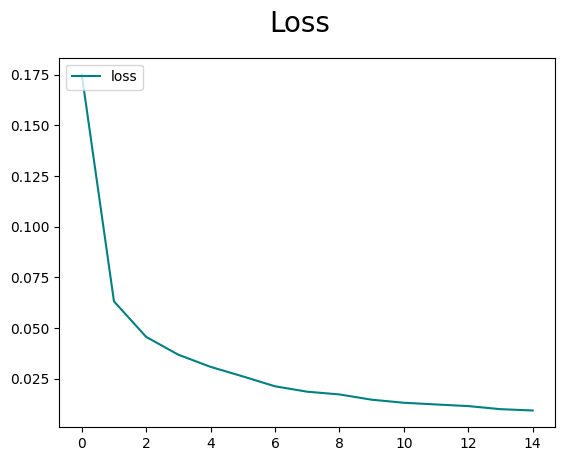

In [91]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

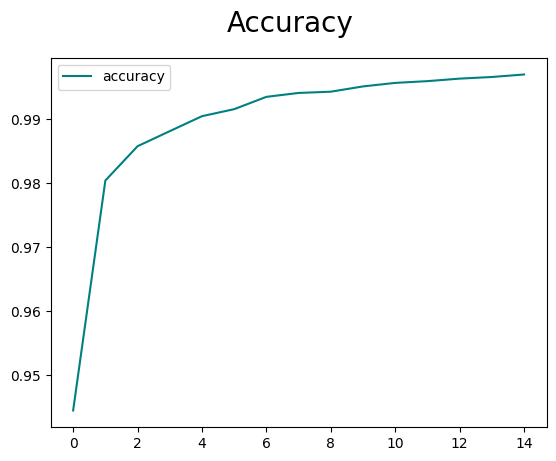

In [92]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

## saving the model

In [94]:
path='model21.keras'
model.save(path)

In [24]:
from tensorflow.keras.metrics import Recall, Precision,BinaryAccuracy

In [4]:
# Load the saved model
loaded_model = tf.keras.models.load_model('model2.keras')

In [46]:
y=cv2.imread('data/output_images_train/1/6_label_1.png')

In [6]:
img = cv2.imread('image.png')
resize = tf.image.resize(img,(256,256))
yhat = model.predict(np.expand_dims(resize/255,0))

NameError: name 'model' is not defined

In [115]:
yhat

array([[4.83584609e-21, 3.64173047e-08, 5.63525504e-10, 9.64219426e-16,
        9.99662161e-01, 3.69983592e-11, 1.08332754e-16, 3.37796315e-04,
        7.48703751e-16, 3.86587873e-09]], dtype=float32)

In [116]:
np.argmax(yhat)

4

In [25]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [52]:
var=os.path.join('data','output_images_test')
os.listdir(var)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [53]:
data = tf.keras.utils.image_dataset_from_directory(var)

Found 10000 files belonging to 10 classes.


In [65]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score

def image_generator(folder_paths, batch_size=32):
    for folder_path in folder_paths:
        image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))]
        for i in range(0, len(image_files), batch_size):
            batch_images = [cv2.resize(cv2.imread(img), (256, 256)) for img in image_files[i:i+batch_size]]
            batch_input = np.array([np.expand_dims(img / 255.0, axis=0) for img in batch_images])
            yield batch_input

test_folder = 'data/output_images_train'

# List all subdirectories (assuming each folder corresponds to a class)
class_folders = [os.path.join(test_folder, folder) for folder in os.listdir(test_folder) if os.path.isdir(os.path.join(test_folder, folder))]

# Initialize lists to store results
image_paths = []
predicted_labels = []

# Iterate through batches using the generator
for batch_input in image_generator(class_folders, batch_size=32):
    predictions = loaded_model.predict(batch_input)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    image_paths.extend(image_files)

# Assuming you have actual_labels (extracted from the folder structure)
actual_labels = [int(os.path.basename(os.path.dirname(image_path))) for image_path in image_paths]

# Check lengths and calculate accuracy
if len(actual_labels) != len(predicted_labels):
    print("Error: Lengths of actual_labels and predicted_labels are inconsistent.")
else:
    accuracy = accuracy_score(actual_labels, predicted_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")


1/1 [==============================] - 0s 86ms/step
Error: Lengths of actual_labels and predicted_labels are inconsistent.


In [63]:
# For example, if your folder structure is like: test_folder/class1/image1.jpg
actual_labels = [int(os.path.basename(os.path.dirname(image_path))) for image_path in image_paths]

# Compare actual and predicted labels
for i in range(len(image_paths)):
    print(f"Image: {image_paths[i]}, Actual Label: {actual_labels[i]}, Predicted Label: {predicted_labels[i]}")


Image: data\output_images_train\0\10005_label_0.png, Actual Label: 0, Predicted Label: 0
Image: data\output_images_train\0\1000_label_0.png, Actual Label: 0, Predicted Label: 0
Image: data\output_images_train\0\10010_label_0.png, Actual Label: 0, Predicted Label: 0
Image: data\output_images_train\0\10022_label_0.png, Actual Label: 0, Predicted Label: 0
Image: data\output_images_train\0\10025_label_0.png, Actual Label: 0, Predicted Label: 0
Image: data\output_images_train\0\10026_label_0.png, Actual Label: 0, Predicted Label: 0
Image: data\output_images_train\0\10045_label_0.png, Actual Label: 0, Predicted Label: 0
Image: data\output_images_train\0\10069_label_0.png, Actual Label: 0, Predicted Label: 0
Image: data\output_images_train\0\10071_label_0.png, Actual Label: 0, Predicted Label: 0
Image: data\output_images_train\0\10080_label_0.png, Actual Label: 0, Predicted Label: 0
Image: data\output_images_train\0\10083_label_0.png, Actual Label: 0, Predicted Label: 0
Image: data\output_ima

In [62]:
from sklearn.metrics import accuracy_score

# Assuming you have actual_labels, predicted_labels from the previous example

# Calculate accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")


ValueError: Found input variables with inconsistent numbers of samples: [21517, 112]

In [54]:
data = data.map(lambda x,y:(x/255,y))

In [34]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [55]:
for batch in data.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 248ms/step


ValueError: Shapes (32, 10) and (32,) are incompatible